In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import joblib

## Problem Statement
Health authorities are concerned about the rising prevalence of diabetes and its impact on
public health. This dataset provides an opportunity to analyze key factors influencing diabetes
and develop predictive models to identify individuals at high risk. The goal is to provide
actionable insights for health interventions and assist in early diagno.sis

In [3]:
#Loading the dataset
data=pd.read_excel('C:/Users/NEONSOL/Downloads/diabetes_prediction_dataset.xlsx')
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Exploratory Data Analysis

### Dataset Overview and Cleaning

In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
data.duplicated().sum()

3854

In [11]:
df=data.drop_duplicates()

In [12]:
df.shape

(96146, 9)

## Visualizations

### Histograms: Univariate Distributions

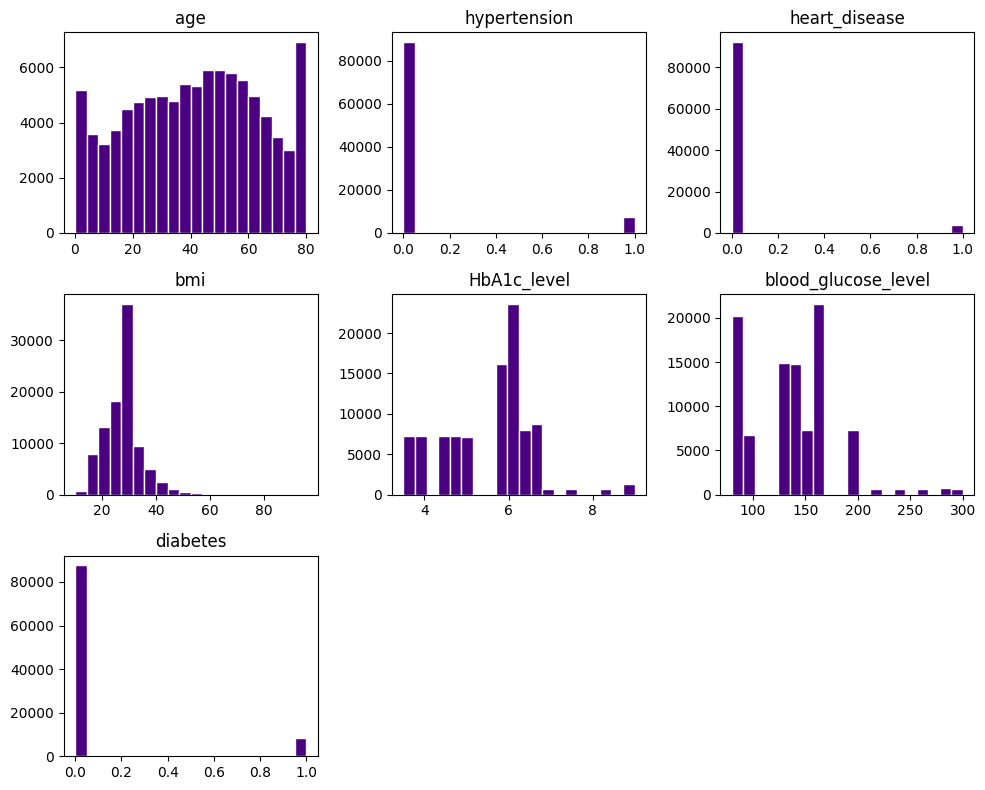

In [15]:
#Univariate Visualization
df.hist(figsize=(10,8), color='indigo', edgecolor="white", grid=(False), bins=20)
plt.title('Univariate Visualizations of Dataset Columns')
plt.tight_layout()
plt.show()

#### Observation

The univariate visualization shows class imbalances observed in the binary features. Features like hypertension, heart_disease, and diabetes are heavily skewed, with the majority of individuals not having these conditions. The age distribution is fairly uniform among middle-aged individuals but shows a sharp decline for both the young and elderly populations. Moreover, BMI and blood_glucose_level show a right-skewed distribution, with most data points concentrated in the lower ranges but with long tails extending toward higher values.

### Pairplot visualizations of Dataset Features

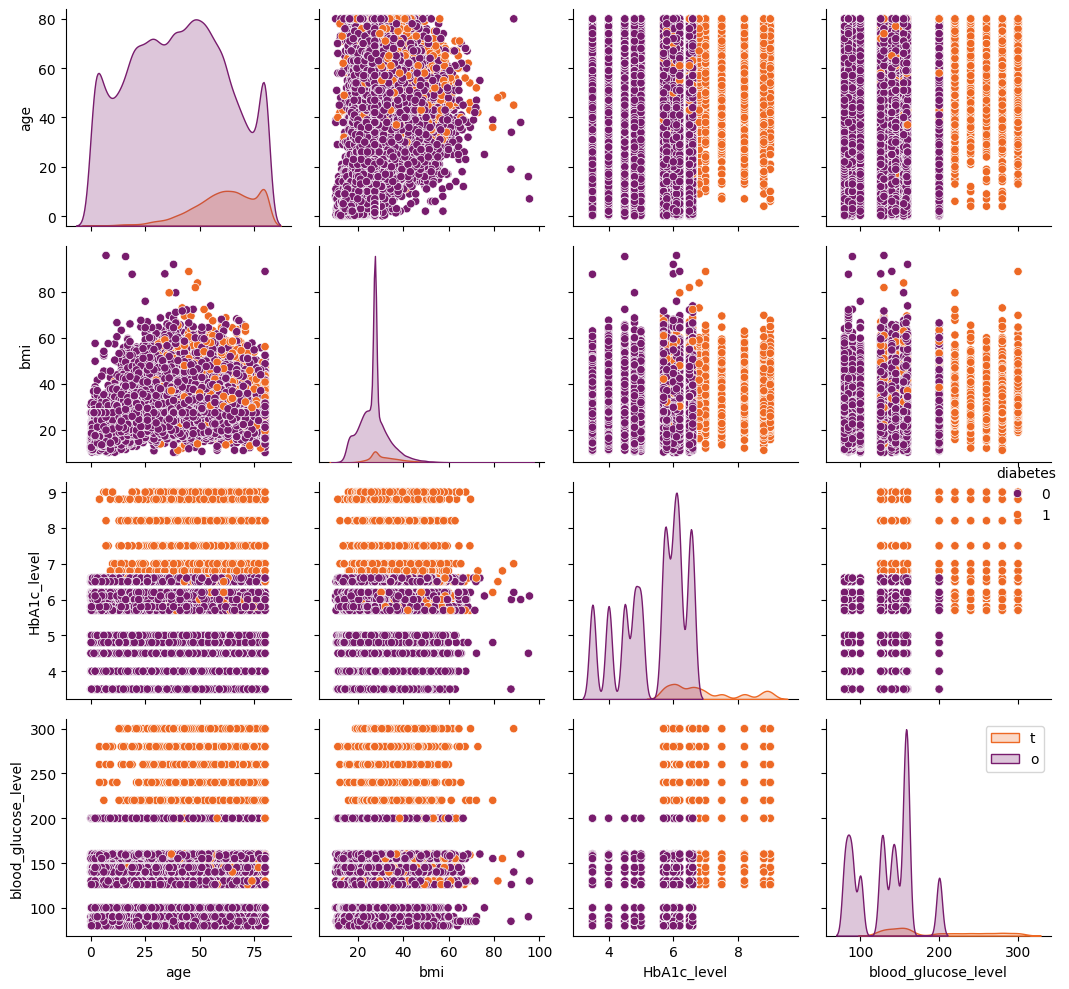

In [18]:
#Pairplot

new_df = df.drop(columns=['hypertension','heart_disease'])

sns.pairplot(data=new_df, hue='diabetes', palette='inferno')
plt.tight_layout()
plt.legend('top_right')
plt.show()

#### Observation

There appears to be a noticeable association between age and diabetes, as diabetic patients (represented by orange markers) tend to be older. Similarly, higher BMI, HbA1c, and blood_glucose_level values also correspond with the presence of diabetes, suggesting that these features may be highly correlated with the target variable, diabetes.

### Boxplot Visualization of Dataset Columns

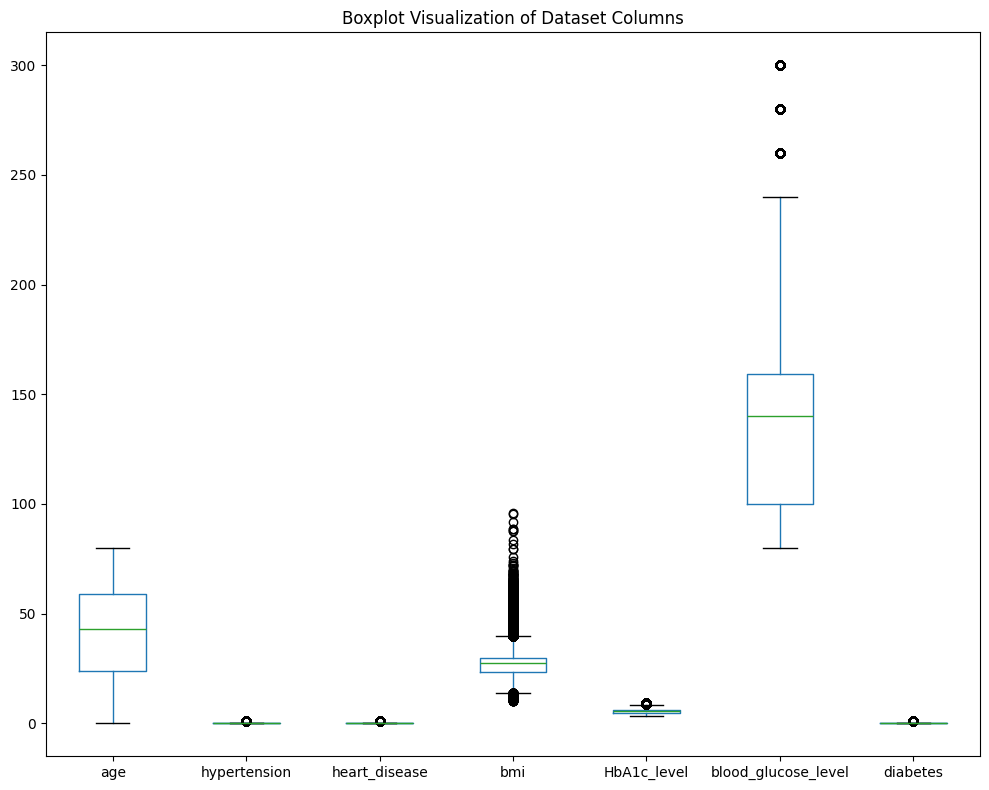

In [21]:
#Boxplots
df.boxplot(figsize=(10,8))
plt.title('Boxplot Visualization of Dataset Columns')
plt.grid(False)
plt.tight_layout()
plt.show()

#### Observation

The boxplot visualization highlights several key observations. The bmi and blood_glucose_level features show numerous outliers, suggesting either extreme values or data quality issues. The blood_glucose_level also exhibits a large interquartile range, indicating significant variability in the data. On the other hand, the age feature has a more symmetric distribution with fewer outliers, showing a normal range. 

Binary features like hypertension, heart_disease, and diabetes are highly compressed with little spread, indicating that the majority of values are clustered around 0. This suggests a significant class imbalance for these features, with most individuals not having these conditions.

### Barplot: Average HbA1c and Blood Glucose Levels against Diabetes Status

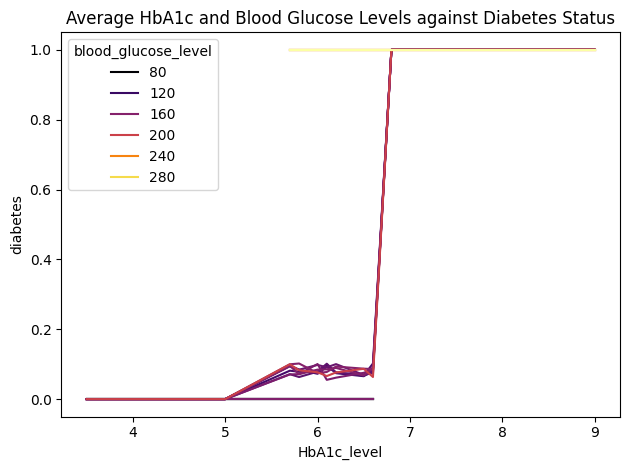

In [24]:
# Average HbA1c and Blood Glucose Levels against Diabetes Status

grouped_data = df.groupby(['blood_glucose_level','HbA1c_level'])['diabetes'].mean().reset_index()

plt.title('Average HbA1c and Blood Glucose Levels against Diabetes Status')
sns.lineplot(data=grouped_data, x='HbA1c_level', y='diabetes', hue='blood_glucose_level', palette='inferno')
plt.tight_layout()
plt.show()

#### Observation

This graph demonstrates the relationship between HbA1c and blood glucose levels across diabetic and non-diabetic individuals. Non-diabetic individuals predominantly cluster in lower HbA1c ranges (approx 5.5%–6.2%), while diabetic individuals occupy higher ranges (6.5%+), with higher blood glucose levels correlating strongly with higher HbA1c values.

### Scatter plot: Body Mass Index Relationship with age and Diabetes Status

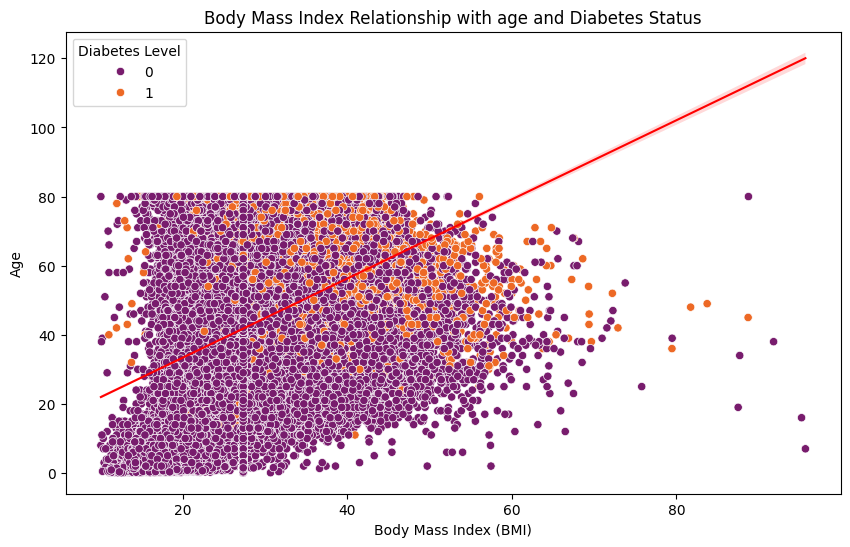

In [27]:
# Scatter plot of BMI vs Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='age', hue='diabetes', palette='inferno', edgecolor='white')

sns.regplot(data=df, x='bmi', y='age', scatter=False, color='red', line_kws={"linewidth": 1.5})

plt.title("Body Mass Index Relationship with age and Diabetes Status")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Age")
plt.legend(title="Diabetes Level")
plt.show()

#### Observation

The scatterplot reveals a positive relationship between BMI and diabetes prevalence, with diabetic individuals (orange points) concentrated at higher BMI ranges (>30). Non-diabetic individuals (purple points) are more broadly distributed across age and BMI but are primarily located in lower BMI ranges. A linear trend shows diabetes prevalence increasing with both age and BMI, underscoring the strong association between obesity and diabetes. However, diabetic individuals with BMI <25 are sparse, highlighting a potential underrepresentation of lean individuals with diabetes, which may bias the findings. The visualization also shows some class imbalance in the dataset as the population with diabetes is significantly less than than that without diabetes, which could cause some issues when training the models. 

### Bar Chart: Age Distribution by Diabetes Status

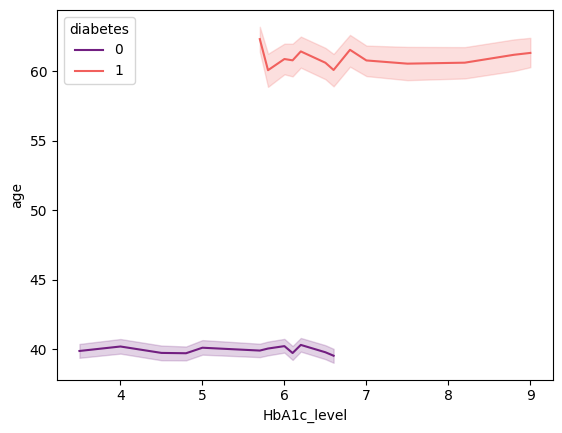

In [30]:
#Age Distribution by Diabetes Status
sns.lineplot(data=df, x='HbA1c_level', y='age', hue='diabetes', palette='magma')
plt.show()

#### Observation

The bar plot indicates a clear distinction between diabetic (HbA1c > 6.6%) and non-diabetic individuals based on HbA1c levels. Most individuals with higher HbA1c levels are classified as diabetic, while lower levels are associated with non-diabetic participants. Despite the consistent age distribution across HbA1c levels, older individuals (typically over 40 years) appear to cluster slightly more in the higher HbA1c range.

### Line Graph: Average Blood Glucose Levels by Age Group and Diabetes Status

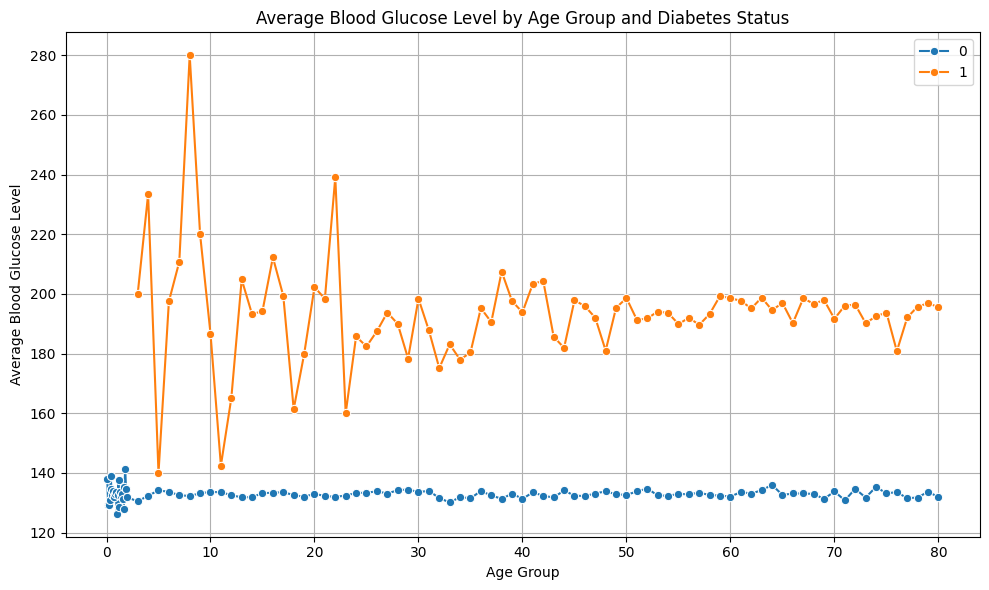

In [33]:
#Average Blood Glucose Levels by Age Group and Diabetes Status
grouped_data = df.groupby(['age', 'diabetes'])['blood_glucose_level'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='age', y='blood_glucose_level', hue='diabetes', marker='o')

plt.title("Average Blood Glucose Level by Age Group and Diabetes Status")
plt.xlabel("Age Group")
plt.ylabel("Average Blood Glucose Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observation

The graph highlights a stark difference in blood glucose levels between individuals with and without diabetes. Diabetic individuals display significantly higher and more variable glucose levels, especially in younger age groups (0– approx 24 years). In contrast, non-diabetic individuals consistently maintain glucose levels between 120 and 140 mg/dL across all age groups. The clear separation between the two groups suggests that blood glucose is a strong indicator for diabetes. 

### Pie-Chart: Average Diabetes Distribution by Gender

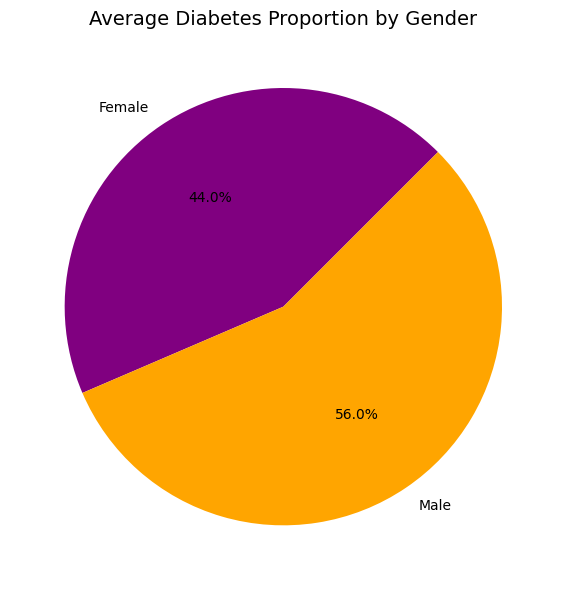

In [36]:
# Group data to calculate the proportion of diabetes by sex
df_filtered = df[df['gender'].isin(['Male', 'Female'])]

# Group and visualize without "Other"
pie_data = df_filtered.groupby('gender')['diabetes'].mean()

plt.figure(figsize=(6, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['purple','orange'], startangle=45)
plt.title("Average Diabetes Proportion by Gender", fontsize=14)
plt.tight_layout()
plt.show()

#### Observation

The pie chart reveals a slight gender imbalance among individuals with diabetes, with males representing 56% of cases compared to 44% for females. This male predominance might reflect biological differences, lifestyle factors, or sampling bias. 

### Line PLot: Diabetes Distribution by Gender and Age

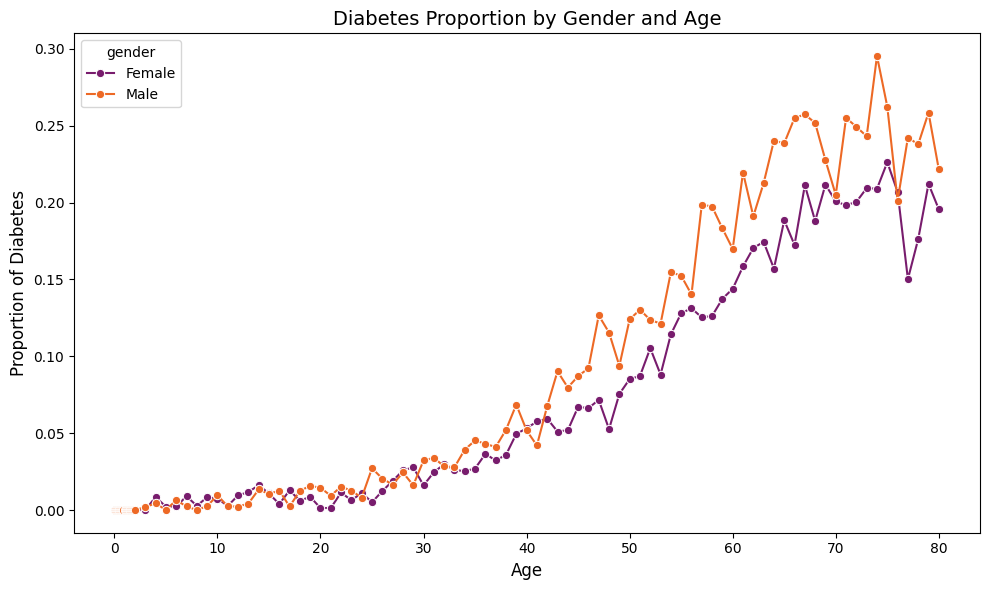

In [39]:
# Group by gender and age group to calculate the diabetes proportion
diabetes_proportion = df_filtered.groupby(['gender', 'age'])['diabetes'].mean().reset_index()

# Plot the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=diabetes_proportion, x='age', y='diabetes', hue='gender', marker='o', palette='inferno')

# Customize plot appearance
plt.title("Diabetes Proportion by Gender and Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Proportion of Diabetes", fontsize=12)
plt.tight_layout()
plt.show()

#### Observation

The line plot shows that the proportion of diabetes increases steadily with age for both genders, highlighting a strong correlation between age and diabetes prevalence. Male participants consistently exhibit a slightly higher proportion of diabetes compared to females, especially in older age groups. 

### Correlation Matrix

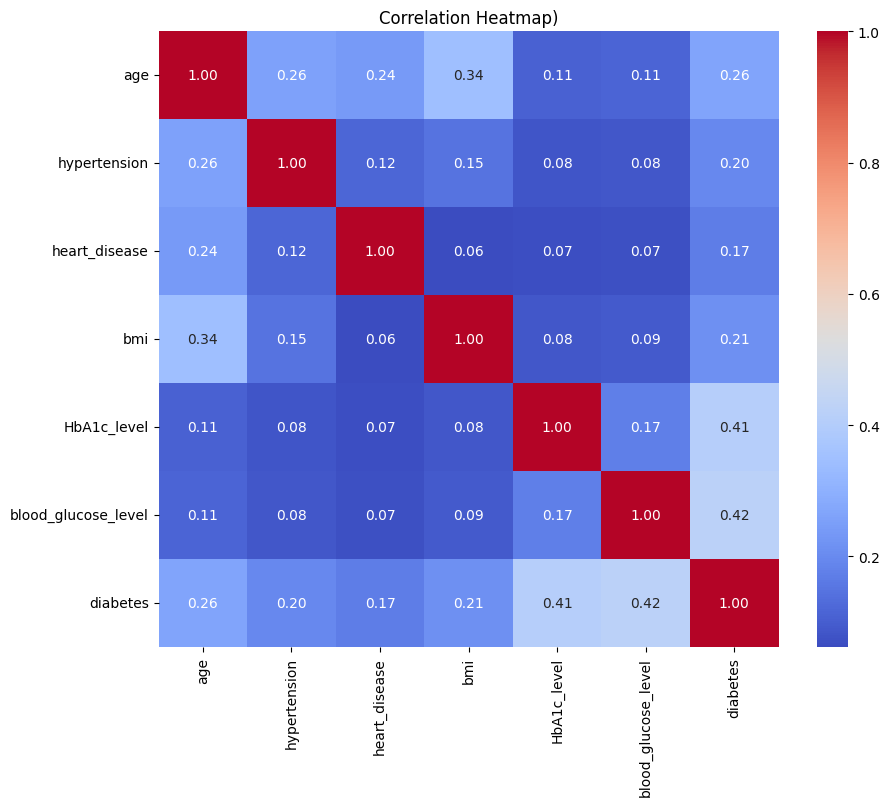

In [42]:
#Correlation Matrix
# Exclude categorical columns from correlation matrix calculation
df_numeric = df.drop(columns=['gender', 'smoking_history'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap)')
plt.show()

#### Observation

The correlation heatmap highlights that diabetes is most strongly correlated with blood glucose level (0.42) and HbA1c level (0.41), making these critical markers for predicting or diagnosing diabetes. Age, BMI, hypertension, and heart disease show moderate correlations with diabetes (0.26, 0.21, 0.20, and 0.17, respectively), suggesting these factors may contribute to risk but are less directly associated. Age has moderate correlations with BMI (0.34), hypertension (0.26), and heart disease (0.24), aligning with known age-related health risks. This analysis suggests prioritizing blood glucose, HbA1c, and age in predictive modeling.

## Machine Learning

### Preprocessing

In [46]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('Categorical columns:', categorical_columns.tolist())

Categorical columns: ['gender', 'smoking_history']


In [47]:
# Label encode categorical columns
df = df.copy()

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [48]:
#verify the encoding
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [49]:
# Separate features and the target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [50]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
#Verify the scaling
X_train_scaled[:,5]

array([ 0.62405051, -1.78928416, -0.94594628, ..., -0.01251451,
       -0.34630499,  0.0391787 ])

### 1. Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

# Train model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [55]:
# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]


Accuracy Score: 0.9569

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



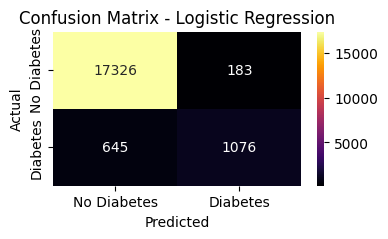

In [56]:
accuracy = accuracy_score(y_test, lr_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

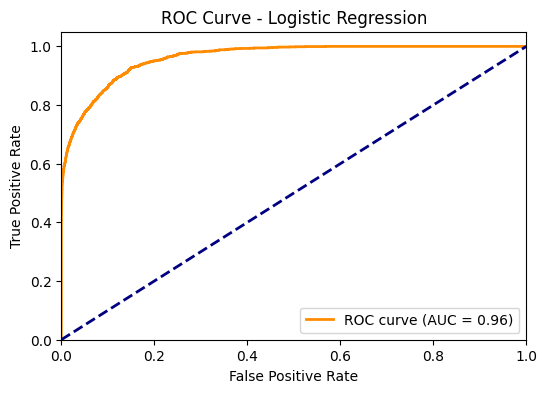

In [57]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## 2. Random Forest

In [59]:
# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

Random Forest Results:

Accuracy Score: 0.9686

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



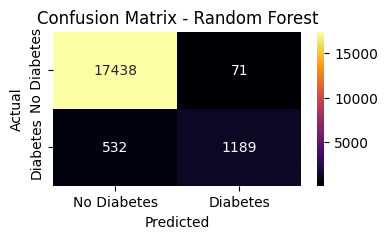

In [61]:
# Random Forest Evaluation
print("Random Forest Results:")

# Accuracy Score
accuracy = accuracy_score(y_test, rf_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(4, 2))  # Adjusted size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

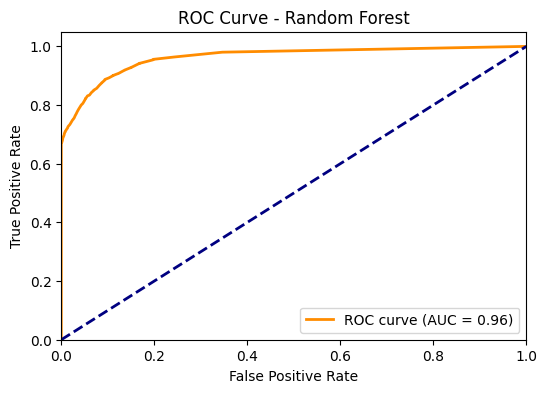

In [62]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

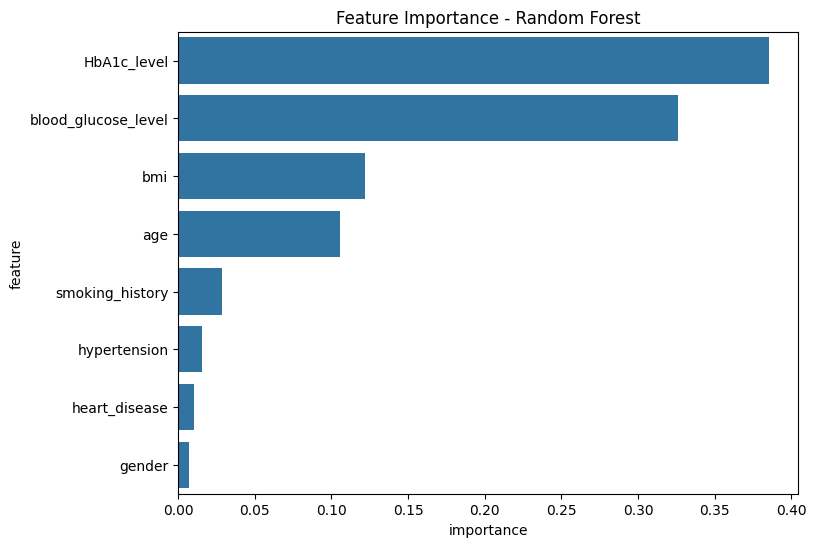

In [63]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns,'importance': rf_model.feature_importances_}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Random Forest')
plt.show()

## 3. Support Vector Machine

In [65]:
# Train model
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [66]:
# Predictions
svm_pred = svm_model.predict(X_test_scaled)
svm_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

SVM Results:

Accuracy Score: 0.9611

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.98      0.58      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.97      0.79      0.85     19230
weighted avg       0.96      0.96      0.96     19230



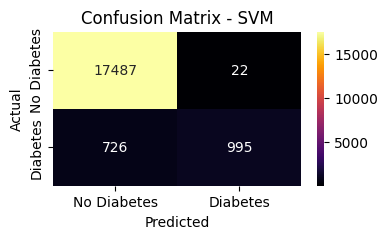

In [67]:
#Evaluation
print("SVM Results:")

accuracy = accuracy_score(y_test, svm_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))

conf_matrix = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

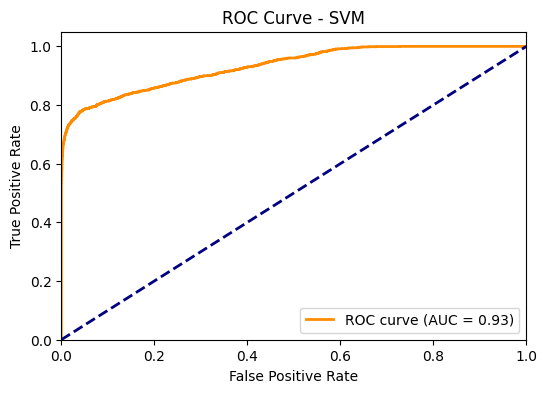

In [68]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

## 4. K-Nearest Neighbors

In [70]:
# Train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [71]:
#Predictions
knn_pred = knn_model.predict(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

K-Nearest Neighbors (KNN) Results:

Accuracy Score: 0.9584

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.88      0.62      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.80      0.85     19230
weighted avg       0.96      0.96      0.96     19230



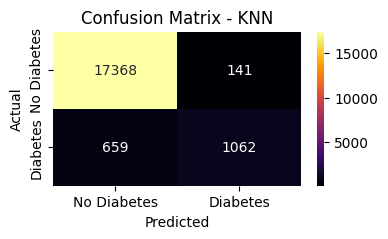

In [72]:
# Model Evaluation
print("K-Nearest Neighbors (KNN) Results:")

# Accuracy Score
accuracy = accuracy_score(y_test, knn_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

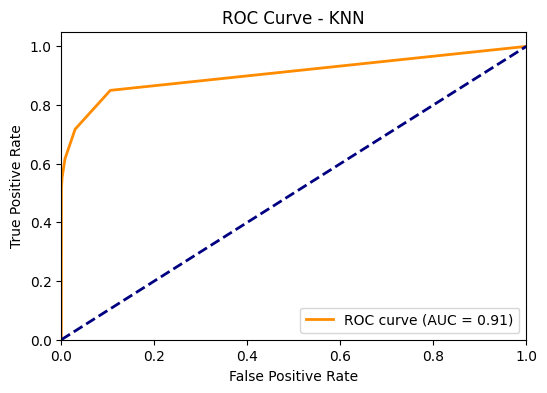

In [73]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

## 5. Gradient Boosting

In [75]:
# Train Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [76]:
# Predict Model
gb_pred = gb_model.predict(X_test_scaled)
gb_prob = gb_model.predict_proba(X_test_scaled)[:, 1]

Gradient Boosting Results:

Accuracy Score: 0.9710

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



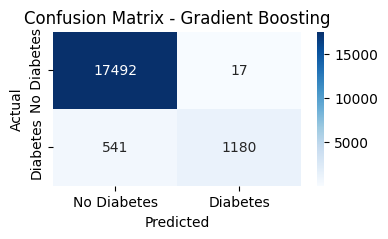

In [77]:
# Model Evaluation
print("Gradient Boosting Results:")

# Accuracy Score
accuracy = accuracy_score(y_test, gb_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

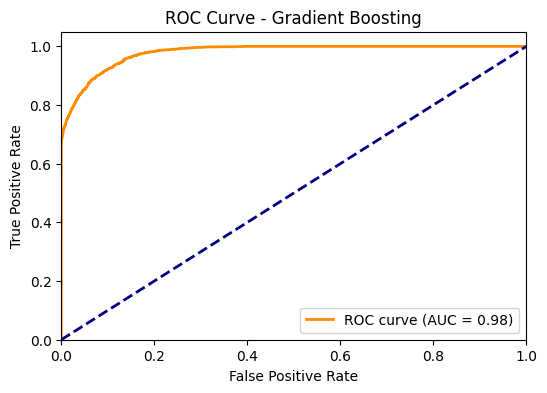

In [78]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

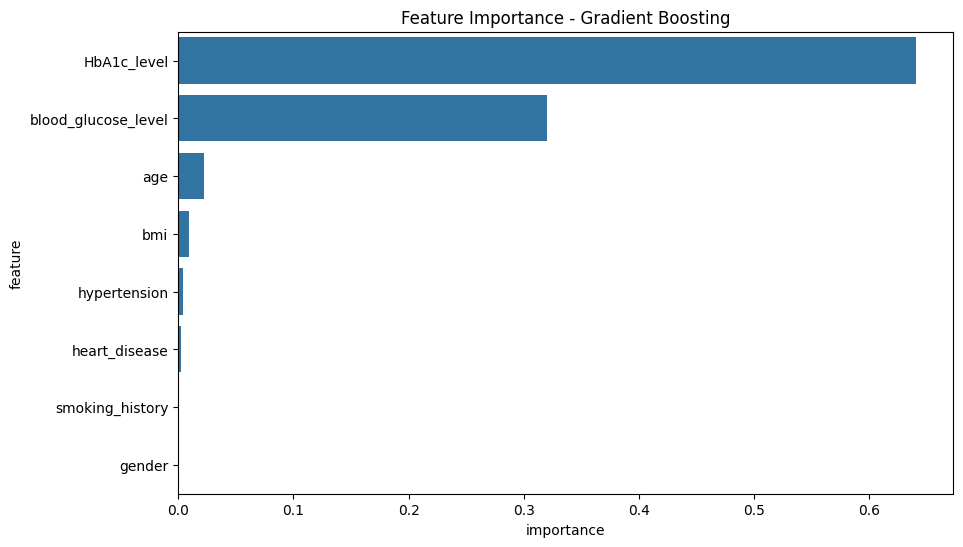

In [79]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Gradient Boosting')
plt.show()

## 6. XGBoost

In [81]:
# Train and Predict Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

XGBoost Results:

Accuracy Score: 0.9699

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.96      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



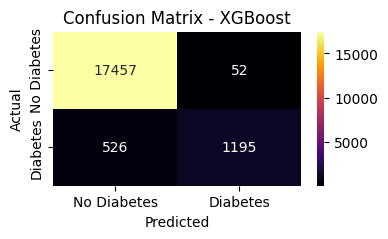

In [82]:
# Model Evaluation
print("XGBoost Results:")

# Accuracy Score
accuracy = accuracy_score(y_test, xgb_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

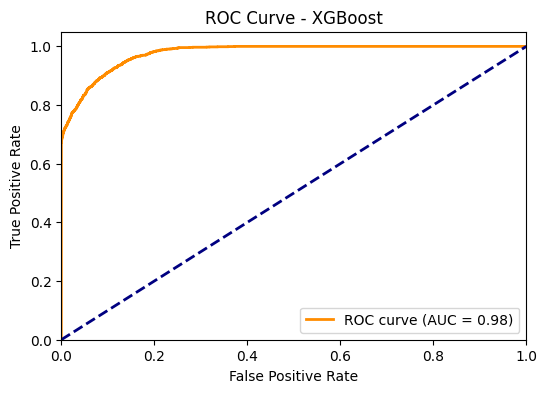

In [83]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

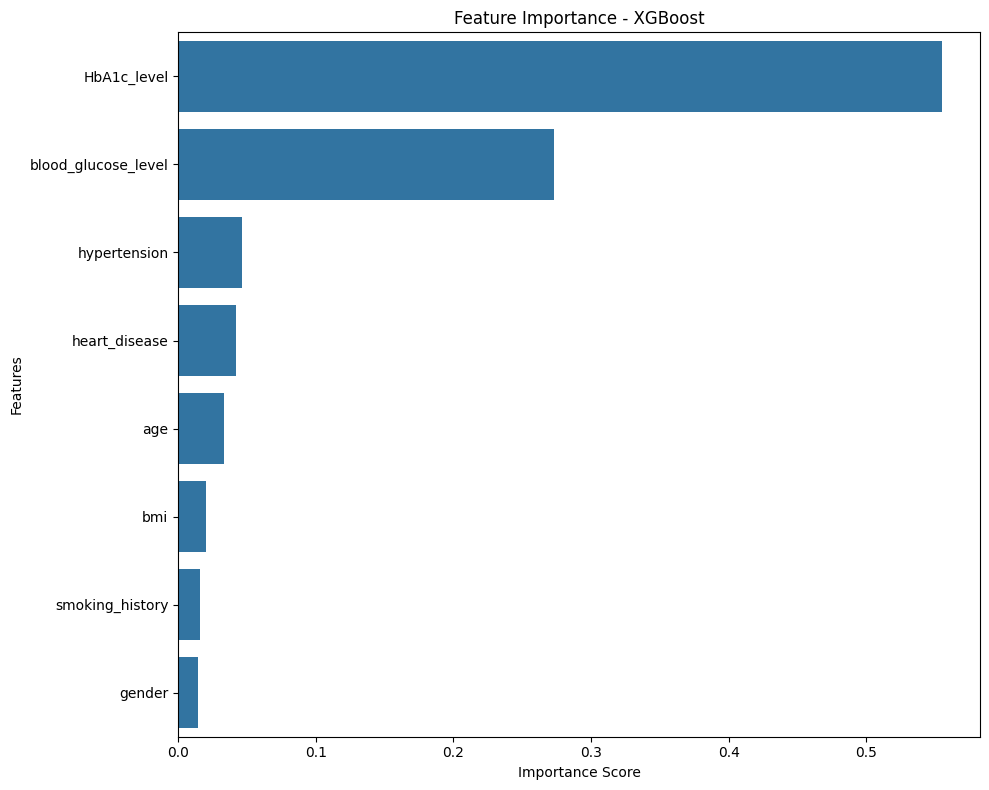

In [84]:
# Feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names,'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Model Comparison

In [86]:
models = {
    'Logistic Regression': lr_model,  
    'Random Forest': rf_model,       
    'Support Vector Machine': svm_model,  
    'K-Nearest Neighbors': knn_model,    
    'Gradient Boosting': gb_model,       
    'XGBoost': xgb_model                 
}


accuracies = {}

for name, model in models.items():
    try:
        predictions = model.predict(X_test_scaled) 
        accuracies[name] = accuracy_score(y_test, predictions) 
    except Exception as e:
        print(f"Error evaluating {name}: {e}")
        accuracies[name] = 0  

the_best_model_name = max(accuracies, key=accuracies.get)
the_best_model_name = models[the_best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {accuracies[the_best_model_name]:.2f}")

NameError: name 'best_model_name' is not defined

In [87]:
# Save the best model
joblib.dump(the_best_model_name, 'the_best_model_name.joblib')
print(f"Best model saved as 'the_best_model_name.joblib")

Best model saved as 'the_best_model_name.joblib
